In [1]:
import models.unet as unet
import preproc.get_data as data
from metrics.visual import plot
import numpy as np

In [2]:
model = unet.get_model(400,400,3)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 400, 400, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 400, 400, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 400, 400, 32) 896         lambda[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 400, 400, 32) 128         conv2d[0][0]                     
______________________________________________________________________________________________

In [3]:
x, y = data.get_training_data()
x_test = data.get_test_data(resize=(400,400))

x_norm = x / 255.0
x_test_norm = x_test / 255.0

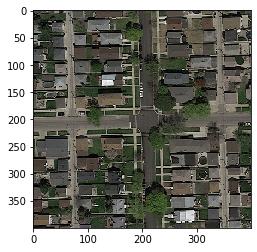

In [4]:
images = [x[0]]

plot(images)

In [ ]:
unet.fit(x_norm, y, model, epochs=1)

Train on 90 samples, validate on 10 samples
64/90 [====================>.........] - ETA: 51s - loss: -39.6964 - accuracy: 0.3580 

In [ ]:
pred = model.predict(x_norm[0:1])

In [ ]:
pred.shape

In [ ]:
pred[0].shape

In [ ]:
plot([x_norm[0], y[0], pred.reshape(400, 400)])

In [ ]:
pred = model.predict(x_test_norm[0:1])
plot([x_test_norm[0], y[0], pred.reshape(400, 400)])

In [ ]:
y[0].shape

In [ ]:
np.argmax(pred, -1)